## Imports

In [1]:
import pandas as pd

import numpy as np

from nilearn import plotting
from nilearn.glm.first_level import FirstLevelModel
from nilearn.glm.second_level import SecondLevelModel
from nilearn.image import threshold_img
from nilearn.glm import threshold_stats_img
from nilearn import surface
from nilearn import datasets
from nilearn.reporting import get_clusters_table
from nilearn.image import resample_to_img
from nilearn.input_data import NiftiMasker, NiftiLabelsMasker
#from nilearn.maskers import NiftiLabelsMasker

import glob

from natsort import natsorted

import matplotlib.pyplot as plt

/home/dgd45125/.local/lib/python3.7/site-packages/nilearn/input_data/__init__.py:27: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)


## Read in the Regressors

## Chinese Regressors

In [8]:
chinese_regressors = pd.read_csv('chinese_regressors/lpp_cn_regressors_13Jan2023.tsv',sep = "\t").drop(columns=['subj_relatives','relatives','disc_filler_gap','WH'])
chinese_regressors

,word_rate,rms,freq,f0,obj_relatives,projective_bottomup,chinese_gpt2_surprisal,seman_dim1,seman_dim2,seman_dim3,seman_dim4,seman_dim5,section
0,0.000000,0.000000,0.000000,0.000000,0.002593,0.020244,-0.089760,-0.005528,-0.000417,0.005681,0.001223,0.008384,1
1,0.003681,0.005161,0.034694,16.586025,0.002482,0.017211,-0.091427,-0.004904,0.000037,0.005609,0.000134,0.008221,1
2,0.044814,0.062256,0.430535,228.376025,0.001235,0.004095,-0.097853,0.000204,0.005255,0.006613,-0.011601,0.007721,1
3,0.100376,0.157604,0.955583,594.716556,-0.000449,-0.008063,-0.075665,0.001853,0.008929,0.009952,-0.020627,0.010139,1
4,0.142764,0.243327,1.327561,866.861677,-0.001734,-0.006474,-0.041610,-0.004170,0.004304,0.012432,-0.013367,0.011784,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2972,0.088587,0.153884,0.759426,916.973736,-0.000235,-0.001216,-0.009229,-0.007106,0.000495,0.004556,0.004296,-0.002697,9
2973,0.104723,0.166189,0.920115,874.126927,-0.000447,-0.003501,-0.019401,0.001696,-0.004631,-0.000744,-0.005908,-0.004852,9
2974,0.130164,0.166403,1.164731,860.597393,-0.000782,-0.003381,-0.033397,0.005717,0.000892,-0.009410,-0.006587,-0.006696,9
2975,0.148257,0.162883,1.304770,854.366261,-0.001021,-0.000174,-0.061724,0.007645,0.007110,-0.012980,-0.006373,-0.005150,9


In [9]:
chinese_regressors = pd.read_csv('chinese_regressors/lpp_cn_regressors_13Jan2023.tsv',sep = "\t").drop(columns=['subj_relatives','relatives','disc_filler_gap','WH'])


chinese_regressors1 = chinese_regressors[chinese_regressors.section==1].drop(columns=['section'])
chinese_regressors1 = (chinese_regressors1-chinese_regressors1.mean())/chinese_regressors1.std()
chinese_regressors1['constant'] = np.ones(len(chinese_regressors1))

chinese_regressors2 = chinese_regressors[chinese_regressors.section==2].drop(columns=['section'])
chinese_regressors2 = (chinese_regressors2-chinese_regressors2.mean())/chinese_regressors2.std()
chinese_regressors2['constant'] = np.ones(len(chinese_regressors2))

chinese_regressors3 = chinese_regressors[chinese_regressors.section==3].drop(columns=['section'])
chinese_regressors3 = (chinese_regressors3-chinese_regressors3.mean())/chinese_regressors3.std()
chinese_regressors3['constant'] = np.ones(len(chinese_regressors3))

chinese_regressors4 = chinese_regressors[chinese_regressors.section==4].drop(columns=['section'])
chinese_regressors4 = (chinese_regressors4-chinese_regressors4.mean())/chinese_regressors4.std()
chinese_regressors4['constant'] = np.ones(len(chinese_regressors4))

chinese_regressors5 = chinese_regressors[chinese_regressors.section==5].drop(columns=['section'])
chinese_regressors5 = (chinese_regressors5-chinese_regressors5.mean())/chinese_regressors5.std()
chinese_regressors5['constant'] = np.ones(len(chinese_regressors5))

chinese_regressors6 = chinese_regressors[chinese_regressors.section==6].drop(columns=['section'])
chinese_regressors6 = (chinese_regressors6-chinese_regressors6.mean())/chinese_regressors6.std()
chinese_regressors6['constant'] = np.ones(len(chinese_regressors6))

chinese_regressors7 = chinese_regressors[chinese_regressors.section==7].drop(columns=['section'])
chinese_regressors7 = (chinese_regressors7-chinese_regressors7.mean())/chinese_regressors7.std()
chinese_regressors7['constant'] = np.ones(len(chinese_regressors7))

chinese_regressors8 = chinese_regressors[chinese_regressors.section==8].drop(columns=['section'])
chinese_regressors8 = (chinese_regressors8-chinese_regressors8.mean())/chinese_regressors8.std()
chinese_regressors8['constant'] = np.ones(len(chinese_regressors8))

chinese_regressors9 = chinese_regressors[chinese_regressors.section==9].drop(columns=['section'])
chinese_regressors9 = (chinese_regressors9-chinese_regressors9.mean())/chinese_regressors9.std()
chinese_regressors9['constant'] = np.ones(len(chinese_regressors9))

chinese_design_matrices = [chinese_regressors1,chinese_regressors2,chinese_regressors3,
                          chinese_regressors4,chinese_regressors5,chinese_regressors6,
                          chinese_regressors7,chinese_regressors8,chinese_regressors9,]

for dmx in chinese_design_matrices:
    print(len(dmx))

283
322
322
307
293
392
364
293
401


In [10]:
#number of volumes in each section
n_chinese_scans = [283,322,322,307,293,392,364,293,401]
print(sum(n_chinese_scans))

2977


<AxesSubplot:label='conditions', ylabel='scan number'>

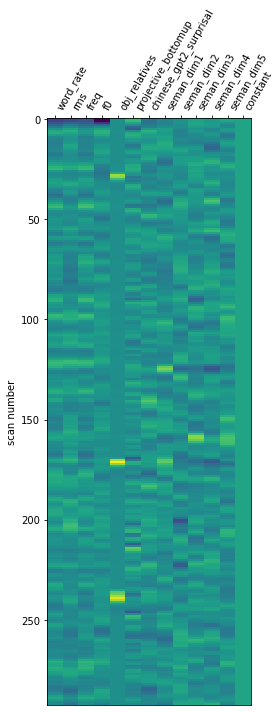

In [11]:
plotting.plot_design_matrix(chinese_design_matrices[7])

## English Regressors

In [12]:
english_regressors = pd.read_csv('english_regressors/lpp_en_regressors_12Jan2023.tsv',sep = "\t").drop(columns=['disc_filler_gap','WH'])
english_regressors

,word_rate,rms,freq,f0,obj_relatives,projective_bottomup,gpt2_surprisal,seman_dim1,seman_dim2,seman_dim3,seman_dim4,seman_dim5,section
0,0.000000,0.000000,0.000000,0.000000,0.004363,-0.017272,-0.211151,-0.002426,-0.010510,-0.004658,-0.003323,0.003490,1
1,0.000647,0.009437,0.004752,10.491500,0.004331,-0.017427,-0.211895,-0.002380,-0.010415,-0.004630,-0.003327,0.003522,1
2,0.027805,0.145643,0.208735,179.405197,0.002982,-0.021824,-0.228904,-0.002049,-0.007340,-0.003901,-0.005096,0.005960,1
3,0.079646,0.367299,0.596170,533.032462,0.000407,-0.020417,-0.254466,-0.003281,-0.004792,-0.002048,-0.008120,0.012568,1
4,0.117950,0.487003,0.849367,805.795838,-0.001496,-0.038469,-0.181909,-0.001954,0.000890,-0.001032,-0.009490,0.007483,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2811,0.110392,0.435250,0.822411,795.012732,-0.000672,0.049302,-0.047509,-0.002866,-0.005946,0.003170,0.004929,0.006803,9
2812,0.112029,0.395219,0.842175,768.481156,-0.000683,0.026709,0.011026,-0.004760,-0.009112,0.002615,0.007920,0.008207,9
2813,0.118791,0.338782,0.917951,671.511479,-0.000729,0.034818,0.103522,-0.008975,-0.010902,0.006388,0.007987,0.013135,9
2814,0.086186,0.190876,0.690954,393.743804,-0.000507,0.050429,0.047821,-0.009912,-0.012176,0.004963,0.006169,0.013943,9


In [13]:
english_regressors = pd.read_csv('english_regressors/lpp_en_regressors_12Jan2023.tsv',sep = "\t").drop(columns=['disc_filler_gap','WH'])
english_regressors['constant'] = np.ones(len(english_regressors))


english_regressors1 = english_regressors[english_regressors.section==1].drop(columns=['section'])
english_regressors1 = (english_regressors1-english_regressors1.mean())/english_regressors1.std()
english_regressors1['constant'] = np.ones(len(english_regressors1))

english_regressors2 = english_regressors[english_regressors.section==2].drop(columns=['section'])
english_regressors2 = (english_regressors2-english_regressors2.mean())/english_regressors2.std()
english_regressors2['constant'] = np.ones(len(english_regressors2))

english_regressors3 = english_regressors[english_regressors.section==3].drop(columns=['section'])
english_regressors3 = (english_regressors3-english_regressors3.mean())/english_regressors3.std()
english_regressors3['constant'] = np.ones(len(english_regressors3))

english_regressors4 = english_regressors[english_regressors.section==4].drop(columns=['section'])
english_regressors4 = (english_regressors4-english_regressors4.mean())/english_regressors4.std()
english_regressors4['constant'] = np.ones(len(english_regressors4))

english_regressors5 = english_regressors[english_regressors.section==5].drop(columns=['section'])
english_regressors5 = (english_regressors5-english_regressors5.mean())/english_regressors5.std()
english_regressors5['constant'] = np.ones(len(english_regressors5))

english_regressors6 = english_regressors[english_regressors.section==6].drop(columns=['section'])
english_regressors6 = (english_regressors6-english_regressors6.mean())/english_regressors6.std()
english_regressors6['constant'] = np.ones(len(english_regressors6))

english_regressors7 = english_regressors[english_regressors.section==7].drop(columns=['section'])
english_regressors7 = (english_regressors7-english_regressors7.mean())/english_regressors7.std()
english_regressors7['constant'] = np.ones(len(english_regressors7))

english_regressors8 = english_regressors[english_regressors.section==8].drop(columns=['section'])
english_regressors8 = (english_regressors8-english_regressors8.mean())/english_regressors8.std()
english_regressors8['constant'] = np.ones(len(english_regressors8))

english_regressors9 = english_regressors[english_regressors.section==9].drop(columns=['section'])
english_regressors9 = (english_regressors9-english_regressors9.mean())/english_regressors9.std()
english_regressors9['constant'] = np.ones(len(english_regressors9))


english_design_matrices = [english_regressors1,english_regressors2,english_regressors3,
                          english_regressors4,english_regressors5,english_regressors6,
                          english_regressors7,english_regressors8,english_regressors9,]

for dmx in english_design_matrices:
    print(len(dmx))

282
298
340
303
265
343
325
292
368


In [14]:
#number of volumes in each section
n_english_scans = [282,298,340,303,265,343,325,292,368]
print(sum(n_english_scans))

2816


<AxesSubplot:label='conditions', ylabel='scan number'>

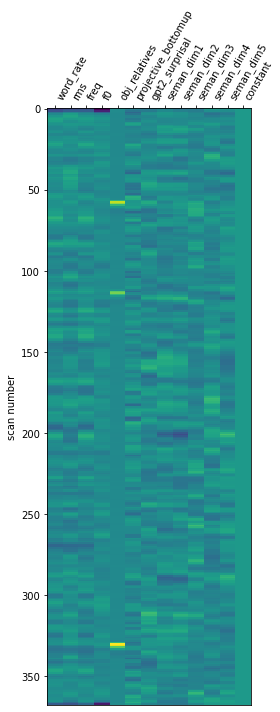

In [15]:
plotting.plot_design_matrix(english_design_matrices[8])

## First-Level GLM models

## Chinese

In [16]:
chinese_subjects = natsorted(glob.glob("openNeuro_LPP/chinese/*"))
chinese_subjects

['openNeuro_LPP/chinese/subj001',
 'openNeuro_LPP/chinese/subj002',
 'openNeuro_LPP/chinese/subj003',
 'openNeuro_LPP/chinese/subj004',
 'openNeuro_LPP/chinese/subj005',
 'openNeuro_LPP/chinese/subj006',
 'openNeuro_LPP/chinese/subj007',
 'openNeuro_LPP/chinese/subj008',
 'openNeuro_LPP/chinese/subj009',
 'openNeuro_LPP/chinese/subj010',
 'openNeuro_LPP/chinese/subj011',
 'openNeuro_LPP/chinese/subj013',
 'openNeuro_LPP/chinese/subj014',
 'openNeuro_LPP/chinese/subj015',
 'openNeuro_LPP/chinese/subj016',
 'openNeuro_LPP/chinese/subj017',
 'openNeuro_LPP/chinese/subj018',
 'openNeuro_LPP/chinese/subj019',
 'openNeuro_LPP/chinese/subj020',
 'openNeuro_LPP/chinese/subj021',
 'openNeuro_LPP/chinese/subj022',
 'openNeuro_LPP/chinese/subj023',
 'openNeuro_LPP/chinese/subj024',
 'openNeuro_LPP/chinese/subj025',
 'openNeuro_LPP/chinese/subj026',
 'openNeuro_LPP/chinese/subj027',
 'openNeuro_LPP/chinese/subj028',
 'openNeuro_LPP/chinese/subj029',
 'openNeuro_LPP/chinese/subj030',
 'openNeuro_LP

In [17]:
natsorted(glob.glob(f"{chinese_subjects[0]}/*"))

['openNeuro_LPP/chinese/subj001/section04.nii.gz',
 'openNeuro_LPP/chinese/subj001/section05.nii.gz',
 'openNeuro_LPP/chinese/subj001/section06.nii.gz',
 'openNeuro_LPP/chinese/subj001/section07.nii.gz',
 'openNeuro_LPP/chinese/subj001/section08.nii.gz',
 'openNeuro_LPP/chinese/subj001/section09.nii.gz',
 'openNeuro_LPP/chinese/subj001/section10.nii.gz',
 'openNeuro_LPP/chinese/subj001/section11.nii.gz',
 'openNeuro_LPP/chinese/subj001/section12.nii.gz']

In [18]:
for i in range(len(chinese_subjects)):
#for i in range(1):
    try:
        print(chinese_subjects[i])

        chinese_glm = FirstLevelModel(
                    t_r = 2.0,
                    hrf_model='spm',
                    noise_model='ar1',
                    smoothing_fwhm=None,
                    n_jobs=1,
                    standardize=True,
                    verbose=1
                    )
        chinese_glm = chinese_glm.fit(natsorted(glob.glob(f"{chinese_subjects[i]}/*")),
                                     design_matrices=chinese_design_matrices)

        #word_rate_eff_map = chinese_glm.compute_contrast(contrast_def='word_rate',output_type='effect_size')
        #word_rate_eff_map.to_filename(f"/scratch/dgd45125/openNeuro_LPP/first_level_maps/chinese/subj{i}_word_rate.nii.gz")

        #rms_eff_map = chinese_glm.compute_contrast(contrast_def='rms',output_type='effect_size')
        #rms_eff_map.to_filename(f"/scratch/dgd45125/openNeuro_LPP/first_level_maps/chinese/subj{i}_rms.nii.gz")

        #f0_eff_map = chinese_glm.compute_contrast(contrast_def='f0',output_type='effect_size')
        #f0_eff_map.to_filename(f"/scratch/dgd45125/openNeuro_LPP/first_level_maps/chinese/subj{i}_f0.nii.gz")

        
        #freq_eff_map = chinese_glm.compute_contrast(contrast_def='freq',output_type='effect_size')
        #freq_eff_map.to_filename(f"/scratch/dgd45125/openNeuro_LPP/first_level_maps/chinese/subj{i}_freq.nii.gz")

        #bottomUp_eff_map = chinese_glm.compute_contrast(contrast_def='projective_bottomup',output_type='effect_size')
        #bottomUp_eff_map.to_filename(f"/scratch/dgd45125/openNeuro_LPP/first_level_maps/chinese/subj{i}_bottomUp.nii.gz")

        
        #chinese_surprisal_eff_map = chinese_glm.compute_contrast(contrast_def='chinese_gpt2_surprisal',output_type='effect_size')
        #chinese_surprisal_eff_map.to_filename(f"/scratch/dgd45125/openNeuro_LPP/first_level_maps/chinese/subj{i}_chinese_surprisal.nii.gz")

        obj_relatives_eff_map = chinese_glm.compute_contrast(contrast_def='obj_relatives',output_type='effect_size')
        obj_relatives_eff_map.to_filename(f"/scratch/dgd45125/openNeuro_LPP/first_level_maps/chinese/subj{i}_obj_relatives_eff.nii.gz")
        
        

    except:
        print("something went wrong")

openNeuro_LPP/chinese/subj001


Computing run 1 out of 9 runs (go take a coffee, a big one)
/home/dgd45125/.local/lib/python3.7/site-packages/nilearn/glm/first_level/first_level.py:63: UserWarning: Mean values of 0 observed.The data have probably been centered.Scaling might not work as expected
  warn('Mean values of 0 observed.'
Computing run 2 out of 9 runs (97 seconds remaining)
Computing run 3 out of 9 runs (91 seconds remaining)
Computing run 4 out of 9 runs (82 seconds remaining)
Computing run 5 out of 9 runs (68 seconds remaining)
Computing run 6 out of 9 runs (53 seconds remaining)
Computing run 7 out of 9 runs (41 seconds remaining)
Computing run 8 out of 9 runs (28 seconds remaining)
Computing run 9 out of 9 runs (13 seconds remaining)

Computation of 9 runs done in 127 seconds

/home/dgd45125/.local/lib/python3.7/site-packages/nilearn/glm/first_level/first_level.py:657: UserWarning: One contrast given, assuming it for all 9 runs
  warn('One contrast given, assuming it for all %d runs' % n_runs)


openNeuro_LPP/chinese/subj002


Computing run 1 out of 9 runs (go take a coffee, a big one)
Computing run 2 out of 9 runs (92 seconds remaining)
Computing run 3 out of 9 runs (85 seconds remaining)
Computing run 4 out of 9 runs (76 seconds remaining)
Computing run 5 out of 9 runs (63 seconds remaining)
Computing run 6 out of 9 runs (50 seconds remaining)
Computing run 7 out of 9 runs (39 seconds remaining)
Computing run 8 out of 9 runs (26 seconds remaining)
Computing run 9 out of 9 runs (13 seconds remaining)

Computation of 9 runs done in 119 seconds



openNeuro_LPP/chinese/subj003


Computing run 1 out of 9 runs (go take a coffee, a big one)
Computing run 2 out of 9 runs (95 seconds remaining)
Computing run 3 out of 9 runs (180 seconds remaining)
Computing run 4 out of 9 runs (134 seconds remaining)
Computing run 5 out of 9 runs (100 seconds remaining)
Computing run 6 out of 9 runs (74 seconds remaining)
Computing run 7 out of 9 runs (55 seconds remaining)
Computing run 8 out of 9 runs (37 seconds remaining)
Computing run 9 out of 9 runs (18 seconds remaining)

Computation of 9 runs done in 161 seconds



openNeuro_LPP/chinese/subj004


Computing run 1 out of 9 runs (go take a coffee, a big one)
Computing run 2 out of 9 runs (102 seconds remaining)
Computing run 3 out of 9 runs (97 seconds remaining)
Computing run 4 out of 9 runs (83 seconds remaining)
Computing run 5 out of 9 runs (69 seconds remaining)
Computing run 6 out of 9 runs (55 seconds remaining)
Computing run 7 out of 9 runs (43 seconds remaining)
Computing run 8 out of 9 runs (29 seconds remaining)
Computing run 9 out of 9 runs (14 seconds remaining)

Computation of 9 runs done in 133 seconds



openNeuro_LPP/chinese/subj005


Computing run 1 out of 9 runs (go take a coffee, a big one)
Computing run 2 out of 9 runs (100 seconds remaining)
Computing run 3 out of 9 runs (97 seconds remaining)
Computing run 4 out of 9 runs (86 seconds remaining)
Computing run 5 out of 9 runs (80 seconds remaining)
Computing run 6 out of 9 runs (63 seconds remaining)
Computing run 7 out of 9 runs (51 seconds remaining)
Computing run 8 out of 9 runs (34 seconds remaining)
Computing run 9 out of 9 runs (16 seconds remaining)

Computation of 9 runs done in 151 seconds



openNeuro_LPP/chinese/subj006


Computing run 1 out of 9 runs (go take a coffee, a big one)
Computing run 2 out of 9 runs (126 seconds remaining)
Computing run 3 out of 9 runs (110 seconds remaining)
Computing run 4 out of 9 runs (92 seconds remaining)
Computing run 5 out of 9 runs (76 seconds remaining)
Computing run 6 out of 9 runs (59 seconds remaining)
Computing run 7 out of 9 runs (46 seconds remaining)
Computing run 8 out of 9 runs (31 seconds remaining)
Computing run 9 out of 9 runs (15 seconds remaining)

Computation of 9 runs done in 144 seconds



openNeuro_LPP/chinese/subj007


Computing run 1 out of 9 runs (go take a coffee, a big one)
Computing run 2 out of 9 runs (98 seconds remaining)
Computing run 3 out of 9 runs (107 seconds remaining)
Computing run 4 out of 9 runs (95 seconds remaining)
Computing run 5 out of 9 runs (78 seconds remaining)
Computing run 6 out of 9 runs (63 seconds remaining)
Computing run 7 out of 9 runs (50 seconds remaining)
Computing run 8 out of 9 runs (33 seconds remaining)
Computing run 9 out of 9 runs (16 seconds remaining)

Computation of 9 runs done in 153 seconds



openNeuro_LPP/chinese/subj008


Computing run 1 out of 9 runs (go take a coffee, a big one)
Computing run 2 out of 9 runs (110 seconds remaining)
Computing run 3 out of 9 runs (104 seconds remaining)
Computing run 4 out of 9 runs (93 seconds remaining)
Computing run 5 out of 9 runs (81 seconds remaining)
Computing run 6 out of 9 runs (63 seconds remaining)
Computing run 7 out of 9 runs (48 seconds remaining)
Computing run 8 out of 9 runs (33 seconds remaining)
Computing run 9 out of 9 runs (16 seconds remaining)

Computation of 9 runs done in 152 seconds



openNeuro_LPP/chinese/subj009


Computing run 1 out of 9 runs (go take a coffee, a big one)
Computing run 2 out of 9 runs (124 seconds remaining)
Computing run 3 out of 9 runs (110 seconds remaining)
Computing run 4 out of 9 runs (93 seconds remaining)
Computing run 5 out of 9 runs (81 seconds remaining)
Computing run 6 out of 9 runs (64 seconds remaining)
Computing run 7 out of 9 runs (49 seconds remaining)
Computing run 8 out of 9 runs (33 seconds remaining)
Computing run 9 out of 9 runs (17 seconds remaining)

Computation of 9 runs done in 157 seconds



openNeuro_LPP/chinese/subj010


Computing run 1 out of 9 runs (go take a coffee, a big one)
Computing run 2 out of 9 runs (121 seconds remaining)
Computing run 3 out of 9 runs (112 seconds remaining)
Computing run 4 out of 9 runs (103 seconds remaining)
Computing run 5 out of 9 runs (85 seconds remaining)
Computing run 6 out of 9 runs (69 seconds remaining)
Computing run 7 out of 9 runs (53 seconds remaining)
Computing run 8 out of 9 runs (35 seconds remaining)
Computing run 9 out of 9 runs (17 seconds remaining)

Computation of 9 runs done in 161 seconds



openNeuro_LPP/chinese/subj011


Computing run 1 out of 9 runs (go take a coffee, a big one)
Computing run 2 out of 9 runs (105 seconds remaining)
Computing run 3 out of 9 runs (153 seconds remaining)
Computing run 4 out of 9 runs (123 seconds remaining)
Computing run 5 out of 9 runs (103 seconds remaining)
Computing run 6 out of 9 runs (80 seconds remaining)
Computing run 7 out of 9 runs (60 seconds remaining)
Computing run 8 out of 9 runs (41 seconds remaining)
Computing run 9 out of 9 runs (20 seconds remaining)

Computation of 9 runs done in 186 seconds



openNeuro_LPP/chinese/subj013


Computing run 1 out of 9 runs (go take a coffee, a big one)
Computing run 2 out of 9 runs (116 seconds remaining)
Computing run 3 out of 9 runs (116 seconds remaining)
Computing run 4 out of 9 runs (98 seconds remaining)
Computing run 5 out of 9 runs (81 seconds remaining)
Computing run 6 out of 9 runs (65 seconds remaining)
Computing run 7 out of 9 runs (51 seconds remaining)
Computing run 8 out of 9 runs (40 seconds remaining)
Computing run 9 out of 9 runs (19 seconds remaining)

Computation of 9 runs done in 173 seconds



openNeuro_LPP/chinese/subj014


Computing run 1 out of 9 runs (go take a coffee, a big one)
Computing run 2 out of 9 runs (118 seconds remaining)
Computing run 3 out of 9 runs (109 seconds remaining)
Computing run 4 out of 9 runs (100 seconds remaining)
Computing run 5 out of 9 runs (84 seconds remaining)
Computing run 6 out of 9 runs (65 seconds remaining)
Computing run 7 out of 9 runs (50 seconds remaining)
Computing run 8 out of 9 runs (34 seconds remaining)
Computing run 9 out of 9 runs (16 seconds remaining)

Computation of 9 runs done in 153 seconds



openNeuro_LPP/chinese/subj015


Computing run 1 out of 9 runs (go take a coffee, a big one)
Computing run 2 out of 9 runs (109 seconds remaining)
Computing run 3 out of 9 runs (106 seconds remaining)
Computing run 4 out of 9 runs (104 seconds remaining)
Computing run 5 out of 9 runs (85 seconds remaining)
Computing run 6 out of 9 runs (66 seconds remaining)
Computing run 7 out of 9 runs (51 seconds remaining)
Computing run 8 out of 9 runs (34 seconds remaining)
Computing run 9 out of 9 runs (17 seconds remaining)

Computation of 9 runs done in 160 seconds



openNeuro_LPP/chinese/subj016


Computing run 1 out of 9 runs (go take a coffee, a big one)
Computing run 2 out of 9 runs (107 seconds remaining)
Computing run 3 out of 9 runs (101 seconds remaining)
Computing run 4 out of 9 runs (95 seconds remaining)
Computing run 5 out of 9 runs (79 seconds remaining)
Computing run 6 out of 9 runs (63 seconds remaining)
Computing run 7 out of 9 runs (48 seconds remaining)
Computing run 8 out of 9 runs (32 seconds remaining)
Computing run 9 out of 9 runs (16 seconds remaining)

Computation of 9 runs done in 151 seconds



openNeuro_LPP/chinese/subj017


Computing run 1 out of 9 runs (go take a coffee, a big one)
Computing run 2 out of 9 runs (117 seconds remaining)
Computing run 3 out of 9 runs (116 seconds remaining)
Computing run 4 out of 9 runs (102 seconds remaining)
Computing run 5 out of 9 runs (84 seconds remaining)
Computing run 6 out of 9 runs (67 seconds remaining)
Computing run 7 out of 9 runs (52 seconds remaining)
Computing run 8 out of 9 runs (35 seconds remaining)
Computing run 9 out of 9 runs (17 seconds remaining)

Computation of 9 runs done in 159 seconds



openNeuro_LPP/chinese/subj018
something went wrong
openNeuro_LPP/chinese/subj019
something went wrong
openNeuro_LPP/chinese/subj020


Computing run 1 out of 9 runs (go take a coffee, a big one)
Computing run 2 out of 9 runs (110 seconds remaining)
Computing run 3 out of 9 runs (111 seconds remaining)
Computing run 4 out of 9 runs (97 seconds remaining)
Computing run 5 out of 9 runs (81 seconds remaining)
Computing run 6 out of 9 runs (65 seconds remaining)
Computing run 7 out of 9 runs (50 seconds remaining)
Computing run 8 out of 9 runs (33 seconds remaining)
Computing run 9 out of 9 runs (16 seconds remaining)

Computation of 9 runs done in 156 seconds



openNeuro_LPP/chinese/subj021


Computing run 1 out of 9 runs (go take a coffee, a big one)
Computing run 2 out of 9 runs (111 seconds remaining)
Computing run 3 out of 9 runs (107 seconds remaining)
Computing run 4 out of 9 runs (95 seconds remaining)
Computing run 5 out of 9 runs (79 seconds remaining)
Computing run 6 out of 9 runs (63 seconds remaining)
Computing run 7 out of 9 runs (49 seconds remaining)
Computing run 8 out of 9 runs (34 seconds remaining)
Computing run 9 out of 9 runs (17 seconds remaining)

Computation of 9 runs done in 156 seconds



openNeuro_LPP/chinese/subj022


Computing run 1 out of 9 runs (go take a coffee, a big one)
Computing run 2 out of 9 runs (101 seconds remaining)
Computing run 3 out of 9 runs (96 seconds remaining)
Computing run 4 out of 9 runs (86 seconds remaining)
Computing run 5 out of 9 runs (70 seconds remaining)
Computing run 6 out of 9 runs (57 seconds remaining)
Computing run 7 out of 9 runs (43 seconds remaining)
Computing run 8 out of 9 runs (29 seconds remaining)
Computing run 9 out of 9 runs (14 seconds remaining)

Computation of 9 runs done in 142 seconds



openNeuro_LPP/chinese/subj023


Computing run 1 out of 9 runs (go take a coffee, a big one)
Computing run 2 out of 9 runs (95 seconds remaining)
Computing run 3 out of 9 runs (101 seconds remaining)
Computing run 4 out of 9 runs (90 seconds remaining)
Computing run 5 out of 9 runs (77 seconds remaining)
Computing run 6 out of 9 runs (60 seconds remaining)
Computing run 7 out of 9 runs (45 seconds remaining)
Computing run 8 out of 9 runs (31 seconds remaining)
Computing run 9 out of 9 runs (17 seconds remaining)

Computation of 9 runs done in 156 seconds



openNeuro_LPP/chinese/subj024


Computing run 1 out of 9 runs (go take a coffee, a big one)
Computing run 2 out of 9 runs (107 seconds remaining)
Computing run 3 out of 9 runs (107 seconds remaining)
Computing run 4 out of 9 runs (92 seconds remaining)
Computing run 5 out of 9 runs (76 seconds remaining)
Computing run 6 out of 9 runs (60 seconds remaining)
Computing run 7 out of 9 runs (48 seconds remaining)
Computing run 8 out of 9 runs (32 seconds remaining)
Computing run 9 out of 9 runs (16 seconds remaining)

Computation of 9 runs done in 148 seconds



openNeuro_LPP/chinese/subj025


Computing run 1 out of 9 runs (go take a coffee, a big one)
Computing run 2 out of 9 runs (106 seconds remaining)
Computing run 3 out of 9 runs (101 seconds remaining)
Computing run 4 out of 9 runs (90 seconds remaining)
Computing run 5 out of 9 runs (79 seconds remaining)
Computing run 6 out of 9 runs (63 seconds remaining)
Computing run 7 out of 9 runs (49 seconds remaining)
Computing run 8 out of 9 runs (35 seconds remaining)
Computing run 9 out of 9 runs (17 seconds remaining)

Computation of 9 runs done in 155 seconds



openNeuro_LPP/chinese/subj026


Computing run 1 out of 9 runs (go take a coffee, a big one)
Computing run 2 out of 9 runs (110 seconds remaining)
Computing run 3 out of 9 runs (112 seconds remaining)
Computing run 4 out of 9 runs (112 seconds remaining)
Computing run 5 out of 9 runs (90 seconds remaining)
Computing run 6 out of 9 runs (70 seconds remaining)
Computing run 7 out of 9 runs (53 seconds remaining)
Computing run 8 out of 9 runs (35 seconds remaining)
Computing run 9 out of 9 runs (17 seconds remaining)

Computation of 9 runs done in 159 seconds



openNeuro_LPP/chinese/subj027


Computing run 1 out of 9 runs (go take a coffee, a big one)
Computing run 2 out of 9 runs (102 seconds remaining)
Computing run 3 out of 9 runs (97 seconds remaining)
Computing run 4 out of 9 runs (85 seconds remaining)
Computing run 5 out of 9 runs (73 seconds remaining)
Computing run 6 out of 9 runs (61 seconds remaining)
Computing run 7 out of 9 runs (50 seconds remaining)
Computing run 8 out of 9 runs (34 seconds remaining)
Computing run 9 out of 9 runs (17 seconds remaining)

Computation of 9 runs done in 154 seconds



openNeuro_LPP/chinese/subj028


Computing run 1 out of 9 runs (go take a coffee, a big one)
Computing run 2 out of 9 runs (107 seconds remaining)
Computing run 3 out of 9 runs (101 seconds remaining)
Computing run 4 out of 9 runs (87 seconds remaining)
Computing run 5 out of 9 runs (76 seconds remaining)
Computing run 6 out of 9 runs (61 seconds remaining)
Computing run 7 out of 9 runs (47 seconds remaining)
Computing run 8 out of 9 runs (31 seconds remaining)
Computing run 9 out of 9 runs (15 seconds remaining)

Computation of 9 runs done in 144 seconds



openNeuro_LPP/chinese/subj029


Computing run 1 out of 9 runs (go take a coffee, a big one)
Computing run 2 out of 9 runs (106 seconds remaining)
Computing run 3 out of 9 runs (101 seconds remaining)
Computing run 4 out of 9 runs (91 seconds remaining)
Computing run 5 out of 9 runs (76 seconds remaining)
Computing run 6 out of 9 runs (60 seconds remaining)
Computing run 7 out of 9 runs (50 seconds remaining)
Computing run 8 out of 9 runs (34 seconds remaining)
Computing run 9 out of 9 runs (16 seconds remaining)

Computation of 9 runs done in 152 seconds



openNeuro_LPP/chinese/subj030


Computing run 1 out of 9 runs (go take a coffee, a big one)
Computing run 2 out of 9 runs (95 seconds remaining)
Computing run 3 out of 9 runs (91 seconds remaining)
Computing run 4 out of 9 runs (83 seconds remaining)
Computing run 5 out of 9 runs (76 seconds remaining)
Computing run 6 out of 9 runs (63 seconds remaining)
Computing run 7 out of 9 runs (49 seconds remaining)
Computing run 8 out of 9 runs (33 seconds remaining)
Computing run 9 out of 9 runs (16 seconds remaining)

Computation of 9 runs done in 152 seconds



openNeuro_LPP/chinese/subj031


Computing run 1 out of 9 runs (go take a coffee, a big one)
Computing run 2 out of 9 runs (96 seconds remaining)
Computing run 3 out of 9 runs (94 seconds remaining)
Computing run 4 out of 9 runs (98 seconds remaining)
Computing run 5 out of 9 runs (83 seconds remaining)
Computing run 6 out of 9 runs (64 seconds remaining)
Computing run 7 out of 9 runs (51 seconds remaining)
Computing run 8 out of 9 runs (34 seconds remaining)
Computing run 9 out of 9 runs (17 seconds remaining)

Computation of 9 runs done in 159 seconds



openNeuro_LPP/chinese/subj032


Computing run 1 out of 9 runs (go take a coffee, a big one)
Computing run 2 out of 9 runs (108 seconds remaining)
Computing run 3 out of 9 runs (108 seconds remaining)
Computing run 4 out of 9 runs (99 seconds remaining)
Computing run 5 out of 9 runs (82 seconds remaining)
Computing run 6 out of 9 runs (65 seconds remaining)
Computing run 7 out of 9 runs (49 seconds remaining)
Computing run 8 out of 9 runs (33 seconds remaining)
Computing run 9 out of 9 runs (17 seconds remaining)

Computation of 9 runs done in 157 seconds



openNeuro_LPP/chinese/subj033


Computing run 1 out of 9 runs (go take a coffee, a big one)
Computing run 2 out of 9 runs (114 seconds remaining)
Computing run 3 out of 9 runs (126 seconds remaining)
Computing run 4 out of 9 runs (124 seconds remaining)
Computing run 5 out of 9 runs (98 seconds remaining)
Computing run 6 out of 9 runs (79 seconds remaining)
Computing run 7 out of 9 runs (60 seconds remaining)
Computing run 8 out of 9 runs (40 seconds remaining)
Computing run 9 out of 9 runs (20 seconds remaining)

Computation of 9 runs done in 183 seconds



openNeuro_LPP/chinese/subj034


Computing run 1 out of 9 runs (go take a coffee, a big one)
Computing run 2 out of 9 runs (113 seconds remaining)
Computing run 3 out of 9 runs (129 seconds remaining)
Computing run 4 out of 9 runs (113 seconds remaining)
Computing run 5 out of 9 runs (92 seconds remaining)
Computing run 6 out of 9 runs (73 seconds remaining)
Computing run 7 out of 9 runs (57 seconds remaining)
Computing run 8 out of 9 runs (37 seconds remaining)
Computing run 9 out of 9 runs (18 seconds remaining)

Computation of 9 runs done in 171 seconds



openNeuro_LPP/chinese/subj036


Computing run 1 out of 9 runs (go take a coffee, a big one)
Computing run 2 out of 9 runs (108 seconds remaining)
Computing run 3 out of 9 runs (120 seconds remaining)
Computing run 4 out of 9 runs (100 seconds remaining)
Computing run 5 out of 9 runs (86 seconds remaining)
Computing run 6 out of 9 runs (75 seconds remaining)
Computing run 7 out of 9 runs (62 seconds remaining)
Computing run 8 out of 9 runs (40 seconds remaining)
Computing run 9 out of 9 runs (19 seconds remaining)

Computation of 9 runs done in 176 seconds



openNeuro_LPP/chinese/subj037


Computing run 1 out of 9 runs (go take a coffee, a big one)
Computing run 2 out of 9 runs (110 seconds remaining)
Computing run 3 out of 9 runs (105 seconds remaining)
Computing run 4 out of 9 runs (92 seconds remaining)
Computing run 5 out of 9 runs (78 seconds remaining)
Computing run 6 out of 9 runs (66 seconds remaining)
Computing run 7 out of 9 runs (51 seconds remaining)
Computing run 8 out of 9 runs (34 seconds remaining)
Computing run 9 out of 9 runs (17 seconds remaining)

Computation of 9 runs done in 162 seconds



## English

In [21]:
english_subjects = natsorted(glob.glob("openNeuro_LPP/english/*"))
english_subjects

['openNeuro_LPP/english/subj057',
 'openNeuro_LPP/english/subj058',
 'openNeuro_LPP/english/subj059',
 'openNeuro_LPP/english/subj061',
 'openNeuro_LPP/english/subj062',
 'openNeuro_LPP/english/subj063',
 'openNeuro_LPP/english/subj064',
 'openNeuro_LPP/english/subj065',
 'openNeuro_LPP/english/subj067',
 'openNeuro_LPP/english/subj068',
 'openNeuro_LPP/english/subj069',
 'openNeuro_LPP/english/subj070',
 'openNeuro_LPP/english/subj072',
 'openNeuro_LPP/english/subj073',
 'openNeuro_LPP/english/subj074',
 'openNeuro_LPP/english/subj075',
 'openNeuro_LPP/english/subj076',
 'openNeuro_LPP/english/subj077',
 'openNeuro_LPP/english/subj078',
 'openNeuro_LPP/english/subj079',
 'openNeuro_LPP/english/subj081',
 'openNeuro_LPP/english/subj082',
 'openNeuro_LPP/english/subj083',
 'openNeuro_LPP/english/subj084',
 'openNeuro_LPP/english/subj086',
 'openNeuro_LPP/english/subj087',
 'openNeuro_LPP/english/subj088',
 'openNeuro_LPP/english/subj089',
 'openNeuro_LPP/english/subj091',
 'openNeuro_LP

In [22]:
natsorted(glob.glob(f"{english_subjects[0]}/*"))

['openNeuro_LPP/english/subj057/section15.nii.gz',
 'openNeuro_LPP/english/subj057/section16.nii.gz',
 'openNeuro_LPP/english/subj057/section17.nii.gz',
 'openNeuro_LPP/english/subj057/section18.nii.gz',
 'openNeuro_LPP/english/subj057/section19.nii.gz',
 'openNeuro_LPP/english/subj057/section20.nii.gz',
 'openNeuro_LPP/english/subj057/section21.nii.gz',
 'openNeuro_LPP/english/subj057/section22.nii.gz',
 'openNeuro_LPP/english/subj057/section23.nii.gz']

In [23]:
for i in range(len(english_subjects)):
#for i in range(1):
    try:
        print(english_subjects[i])

        english_glm = FirstLevelModel(
                    t_r = 2.0,
                    hrf_model='spm',
                    noise_model='ar1',
                    smoothing_fwhm=None,
                    n_jobs=1,
                    standardize=True,
                    verbose=1
                    )
        english_glm = english_glm.fit(natsorted(glob.glob(f"{english_subjects[i]}/*")),
                                     design_matrices=english_design_matrices)

        word_rate_eff_map = english_glm.compute_contrast(contrast_def='word_rate',output_type='effect_size')
        word_rate_eff_map.to_filename(f"/scratch/dgd45125/openNeuro_LPP/first_level_maps/english/subj{i}_word_rate.nii.gz")

        rms_eff_map = english_glm.compute_contrast(contrast_def='rms',output_type='effect_size')
        rms_eff_map.to_filename(f"/scratch/dgd45125/openNeuro_LPP/first_level_maps/english/subj{i}_rms.nii.gz")

        f0_eff_map = english_glm.compute_contrast(contrast_def='f0',output_type='effect_size')
        f0_eff_map.to_filename(f"/scratch/dgd45125/openNeuro_LPP/first_level_maps/english/subj{i}_f0.nii.gz")

        
        freq_eff_map = english_glm.compute_contrast(contrast_def='freq',output_type='effect_size')
        freq_eff_map.to_filename(f"/scratch/dgd45125/openNeuro_LPP/first_level_maps/english/subj{i}_freq.nii.gz")

        bottomUp_eff_map = english_glm.compute_contrast(contrast_def='projective_bottomup',output_type='effect_size')
        bottomUp_eff_map.to_filename(f"/scratch/dgd45125/openNeuro_LPP/first_level_maps/english/subj{i}_bottomUp.nii.gz")

        
        english_surprisal_eff_map = english_glm.compute_contrast(contrast_def='gpt2_surprisal',output_type='effect_size')
        english_surprisal_eff_map.to_filename(f"/scratch/dgd45125/openNeuro_LPP/first_level_maps/english/subj{i}english_surprisal.nii.gz")

        
        obj_relatives_eff_map = english_glm.compute_contrast(contrast_def='obj_relatives',output_type='effect_size')
        obj_relatives_eff_map.to_filename(f"/scratch/dgd45125/openNeuro_LPP/first_level_maps/english/subj{i}_obj_relatives_eff.nii.gz")
        
        
    except:
        print("something went wrong")

openNeuro_LPP/english/subj057


Computing run 1 out of 9 runs (go take a coffee, a big one)
Computing run 2 out of 9 runs (112 seconds remaining)
Computing run 3 out of 9 runs (128 seconds remaining)
Computing run 4 out of 9 runs (103 seconds remaining)
Computing run 5 out of 9 runs (83 seconds remaining)
Computing run 6 out of 9 runs (65 seconds remaining)
Computing run 7 out of 9 runs (48 seconds remaining)
Computing run 8 out of 9 runs (32 seconds remaining)
Computing run 9 out of 9 runs (16 seconds remaining)

Computation of 9 runs done in 152 seconds



openNeuro_LPP/english/subj058


Computing run 1 out of 9 runs (go take a coffee, a big one)
Computing run 2 out of 9 runs (97 seconds remaining)
Computing run 3 out of 9 runs (100 seconds remaining)
Computing run 4 out of 9 runs (84 seconds remaining)
Computing run 5 out of 9 runs (68 seconds remaining)
Computing run 6 out of 9 runs (52 seconds remaining)
Computing run 7 out of 9 runs (40 seconds remaining)
Computing run 8 out of 9 runs (26 seconds remaining)
Computing run 9 out of 9 runs (13 seconds remaining)

Computation of 9 runs done in 123 seconds



openNeuro_LPP/english/subj059


Computing run 1 out of 9 runs (go take a coffee, a big one)
Computing run 2 out of 9 runs (95 seconds remaining)
Computing run 3 out of 9 runs (85 seconds remaining)
Computing run 4 out of 9 runs (77 seconds remaining)
Computing run 5 out of 9 runs (65 seconds remaining)
Computing run 6 out of 9 runs (51 seconds remaining)
Computing run 7 out of 9 runs (39 seconds remaining)
Computing run 8 out of 9 runs (26 seconds remaining)
Computing run 9 out of 9 runs (13 seconds remaining)

Computation of 9 runs done in 120 seconds



openNeuro_LPP/english/subj061


Computing run 1 out of 9 runs (go take a coffee, a big one)
Computing run 2 out of 9 runs (96 seconds remaining)
Computing run 3 out of 9 runs (87 seconds remaining)
Computing run 4 out of 9 runs (78 seconds remaining)
Computing run 5 out of 9 runs (65 seconds remaining)
Computing run 6 out of 9 runs (52 seconds remaining)
Computing run 7 out of 9 runs (41 seconds remaining)
Computing run 8 out of 9 runs (27 seconds remaining)
Computing run 9 out of 9 runs (14 seconds remaining)

Computation of 9 runs done in 131 seconds



openNeuro_LPP/english/subj062


Computing run 1 out of 9 runs (go take a coffee, a big one)
Computing run 2 out of 9 runs (101 seconds remaining)
Computing run 3 out of 9 runs (108 seconds remaining)
Computing run 4 out of 9 runs (94 seconds remaining)
Computing run 5 out of 9 runs (80 seconds remaining)
Computing run 6 out of 9 runs (63 seconds remaining)
Computing run 7 out of 9 runs (48 seconds remaining)
Computing run 8 out of 9 runs (31 seconds remaining)
Computing run 9 out of 9 runs (15 seconds remaining)

Computation of 9 runs done in 146 seconds



openNeuro_LPP/english/subj063


Computing run 1 out of 9 runs (go take a coffee, a big one)
Computing run 2 out of 9 runs (97 seconds remaining)
Computing run 3 out of 9 runs (93 seconds remaining)
Computing run 4 out of 9 runs (92 seconds remaining)
Computing run 5 out of 9 runs (79 seconds remaining)
Computing run 6 out of 9 runs (62 seconds remaining)
Computing run 7 out of 9 runs (51 seconds remaining)
Computing run 8 out of 9 runs (34 seconds remaining)
Computing run 9 out of 9 runs (16 seconds remaining)

Computation of 9 runs done in 155 seconds



openNeuro_LPP/english/subj064


Computing run 1 out of 9 runs (go take a coffee, a big one)
Computing run 2 out of 9 runs (96 seconds remaining)
Computing run 3 out of 9 runs (98 seconds remaining)
Computing run 4 out of 9 runs (93 seconds remaining)
Computing run 5 out of 9 runs (80 seconds remaining)
Computing run 6 out of 9 runs (63 seconds remaining)
Computing run 7 out of 9 runs (49 seconds remaining)
Computing run 8 out of 9 runs (33 seconds remaining)
Computing run 9 out of 9 runs (16 seconds remaining)

Computation of 9 runs done in 154 seconds



openNeuro_LPP/english/subj065


Computing run 1 out of 9 runs (go take a coffee, a big one)
Computing run 2 out of 9 runs (104 seconds remaining)
Computing run 3 out of 9 runs (103 seconds remaining)
Computing run 4 out of 9 runs (108 seconds remaining)
Computing run 5 out of 9 runs (89 seconds remaining)
Computing run 6 out of 9 runs (69 seconds remaining)
Computing run 7 out of 9 runs (52 seconds remaining)
Computing run 8 out of 9 runs (34 seconds remaining)
Computing run 9 out of 9 runs (17 seconds remaining)

Computation of 9 runs done in 160 seconds



openNeuro_LPP/english/subj067


Computing run 1 out of 9 runs (go take a coffee, a big one)
Computing run 2 out of 9 runs (105 seconds remaining)
Computing run 3 out of 9 runs (115 seconds remaining)
Computing run 4 out of 9 runs (98 seconds remaining)
Computing run 5 out of 9 runs (87 seconds remaining)
Computing run 6 out of 9 runs (68 seconds remaining)
Computing run 7 out of 9 runs (52 seconds remaining)
Computing run 8 out of 9 runs (35 seconds remaining)
Computing run 9 out of 9 runs (17 seconds remaining)

Computation of 9 runs done in 162 seconds



openNeuro_LPP/english/subj068


Computing run 1 out of 9 runs (go take a coffee, a big one)
Computing run 2 out of 9 runs (98 seconds remaining)
Computing run 3 out of 9 runs (97 seconds remaining)
Computing run 4 out of 9 runs (91 seconds remaining)
Computing run 5 out of 9 runs (85 seconds remaining)
Computing run 6 out of 9 runs (66 seconds remaining)
Computing run 7 out of 9 runs (50 seconds remaining)
Computing run 8 out of 9 runs (34 seconds remaining)
Computing run 9 out of 9 runs (16 seconds remaining)

Computation of 9 runs done in 154 seconds



openNeuro_LPP/english/subj069


Computing run 1 out of 9 runs (go take a coffee, a big one)
Computing run 2 out of 9 runs (97 seconds remaining)
Computing run 3 out of 9 runs (110 seconds remaining)
Computing run 4 out of 9 runs (94 seconds remaining)
Computing run 5 out of 9 runs (82 seconds remaining)
Computing run 6 out of 9 runs (64 seconds remaining)
Computing run 7 out of 9 runs (50 seconds remaining)
Computing run 8 out of 9 runs (35 seconds remaining)
Computing run 9 out of 9 runs (17 seconds remaining)

Computation of 9 runs done in 163 seconds



openNeuro_LPP/english/subj070


Computing run 1 out of 9 runs (go take a coffee, a big one)
Computing run 2 out of 9 runs (98 seconds remaining)
Computing run 3 out of 9 runs (109 seconds remaining)
Computing run 4 out of 9 runs (94 seconds remaining)
Computing run 5 out of 9 runs (77 seconds remaining)
Computing run 6 out of 9 runs (60 seconds remaining)
Computing run 7 out of 9 runs (46 seconds remaining)
Computing run 8 out of 9 runs (32 seconds remaining)
Computing run 9 out of 9 runs (16 seconds remaining)

Computation of 9 runs done in 148 seconds



openNeuro_LPP/english/subj072


Computing run 1 out of 9 runs (go take a coffee, a big one)
Computing run 2 out of 9 runs (110 seconds remaining)
Computing run 3 out of 9 runs (110 seconds remaining)
Computing run 4 out of 9 runs (99 seconds remaining)
Computing run 5 out of 9 runs (81 seconds remaining)
Computing run 6 out of 9 runs (62 seconds remaining)
Computing run 7 out of 9 runs (50 seconds remaining)
Computing run 8 out of 9 runs (35 seconds remaining)
Computing run 9 out of 9 runs (18 seconds remaining)

Computation of 9 runs done in 164 seconds



openNeuro_LPP/english/subj073


Computing run 1 out of 9 runs (go take a coffee, a big one)
Computing run 2 out of 9 runs (108 seconds remaining)
Computing run 3 out of 9 runs (105 seconds remaining)
Computing run 4 out of 9 runs (93 seconds remaining)
Computing run 5 out of 9 runs (76 seconds remaining)
Computing run 6 out of 9 runs (59 seconds remaining)
Computing run 7 out of 9 runs (44 seconds remaining)
Computing run 8 out of 9 runs (30 seconds remaining)
Computing run 9 out of 9 runs (15 seconds remaining)

Computation of 9 runs done in 138 seconds



openNeuro_LPP/english/subj074


Computing run 1 out of 9 runs (go take a coffee, a big one)
Computing run 2 out of 9 runs (98 seconds remaining)
Computing run 3 out of 9 runs (91 seconds remaining)
Computing run 4 out of 9 runs (80 seconds remaining)
Computing run 5 out of 9 runs (66 seconds remaining)
Computing run 6 out of 9 runs (52 seconds remaining)
Computing run 7 out of 9 runs (39 seconds remaining)
Computing run 8 out of 9 runs (26 seconds remaining)
Computing run 9 out of 9 runs (13 seconds remaining)

Computation of 9 runs done in 123 seconds



openNeuro_LPP/english/subj075


Computing run 1 out of 9 runs (go take a coffee, a big one)
Computing run 2 out of 9 runs (93 seconds remaining)
Computing run 3 out of 9 runs (88 seconds remaining)
Computing run 4 out of 9 runs (79 seconds remaining)
Computing run 5 out of 9 runs (66 seconds remaining)
Computing run 6 out of 9 runs (51 seconds remaining)
Computing run 7 out of 9 runs (39 seconds remaining)
Computing run 8 out of 9 runs (26 seconds remaining)
Computing run 9 out of 9 runs (13 seconds remaining)

Computation of 9 runs done in 120 seconds



openNeuro_LPP/english/subj076


Computing run 1 out of 9 runs (go take a coffee, a big one)
Computing run 2 out of 9 runs (93 seconds remaining)
Computing run 3 out of 9 runs (95 seconds remaining)
Computing run 4 out of 9 runs (84 seconds remaining)
Computing run 5 out of 9 runs (76 seconds remaining)
Computing run 6 out of 9 runs (59 seconds remaining)
Computing run 7 out of 9 runs (44 seconds remaining)
Computing run 8 out of 9 runs (34 seconds remaining)
Computing run 9 out of 9 runs (16 seconds remaining)

Computation of 9 runs done in 151 seconds



openNeuro_LPP/english/subj077


Computing run 1 out of 9 runs (go take a coffee, a big one)
Computing run 2 out of 9 runs (93 seconds remaining)
Computing run 3 out of 9 runs (93 seconds remaining)
Computing run 4 out of 9 runs (83 seconds remaining)
Computing run 5 out of 9 runs (70 seconds remaining)
Computing run 6 out of 9 runs (55 seconds remaining)
Computing run 7 out of 9 runs (43 seconds remaining)
Computing run 8 out of 9 runs (30 seconds remaining)
Computing run 9 out of 9 runs (15 seconds remaining)

Computation of 9 runs done in 140 seconds



openNeuro_LPP/english/subj078


Computing run 1 out of 9 runs (go take a coffee, a big one)
Computing run 2 out of 9 runs (111 seconds remaining)
Computing run 3 out of 9 runs (108 seconds remaining)
Computing run 4 out of 9 runs (98 seconds remaining)
Computing run 5 out of 9 runs (79 seconds remaining)
Computing run 6 out of 9 runs (63 seconds remaining)
Computing run 7 out of 9 runs (48 seconds remaining)
Computing run 8 out of 9 runs (31 seconds remaining)
Computing run 9 out of 9 runs (15 seconds remaining)

Computation of 9 runs done in 144 seconds



openNeuro_LPP/english/subj079


Computing run 1 out of 9 runs (go take a coffee, a big one)
Computing run 2 out of 9 runs (105 seconds remaining)
Computing run 3 out of 9 runs (99 seconds remaining)
Computing run 4 out of 9 runs (102 seconds remaining)
Computing run 5 out of 9 runs (85 seconds remaining)
Computing run 6 out of 9 runs (65 seconds remaining)
Computing run 7 out of 9 runs (49 seconds remaining)
Computing run 8 out of 9 runs (33 seconds remaining)
Computing run 9 out of 9 runs (16 seconds remaining)

Computation of 9 runs done in 156 seconds



openNeuro_LPP/english/subj081


Computing run 1 out of 9 runs (go take a coffee, a big one)
Computing run 2 out of 9 runs (97 seconds remaining)
Computing run 3 out of 9 runs (96 seconds remaining)
Computing run 4 out of 9 runs (101 seconds remaining)
Computing run 5 out of 9 runs (86 seconds remaining)
Computing run 6 out of 9 runs (72 seconds remaining)
Computing run 7 out of 9 runs (53 seconds remaining)
Computing run 8 out of 9 runs (36 seconds remaining)
Computing run 9 out of 9 runs (19 seconds remaining)

Computation of 9 runs done in 195 seconds



openNeuro_LPP/english/subj082


Computing run 1 out of 9 runs (go take a coffee, a big one)
Computing run 2 out of 9 runs (108 seconds remaining)
Computing run 3 out of 9 runs (95 seconds remaining)
Computing run 4 out of 9 runs (88 seconds remaining)
Computing run 5 out of 9 runs (76 seconds remaining)
Computing run 6 out of 9 runs (58 seconds remaining)
Computing run 7 out of 9 runs (45 seconds remaining)
Computing run 8 out of 9 runs (30 seconds remaining)
Computing run 9 out of 9 runs (14 seconds remaining)

Computation of 9 runs done in 145 seconds



openNeuro_LPP/english/subj083


Computing run 1 out of 9 runs (go take a coffee, a big one)
Computing run 2 out of 9 runs (118 seconds remaining)
Computing run 3 out of 9 runs (114 seconds remaining)
Computing run 4 out of 9 runs (107 seconds remaining)
Computing run 5 out of 9 runs (90 seconds remaining)
Computing run 6 out of 9 runs (76 seconds remaining)
Computing run 7 out of 9 runs (56 seconds remaining)
Computing run 8 out of 9 runs (37 seconds remaining)
Computing run 9 out of 9 runs (18 seconds remaining)

Computation of 9 runs done in 170 seconds



openNeuro_LPP/english/subj084


Computing run 1 out of 9 runs (go take a coffee, a big one)
Computing run 2 out of 9 runs (107 seconds remaining)
Computing run 3 out of 9 runs (99 seconds remaining)
Computing run 4 out of 9 runs (89 seconds remaining)
Computing run 5 out of 9 runs (75 seconds remaining)
Computing run 6 out of 9 runs (61 seconds remaining)
Computing run 7 out of 9 runs (47 seconds remaining)
Computing run 8 out of 9 runs (33 seconds remaining)
Computing run 9 out of 9 runs (16 seconds remaining)

Computation of 9 runs done in 153 seconds



openNeuro_LPP/english/subj086


Computing run 1 out of 9 runs (go take a coffee, a big one)
Computing run 2 out of 9 runs (90 seconds remaining)
Computing run 3 out of 9 runs (84 seconds remaining)
Computing run 4 out of 9 runs (79 seconds remaining)
Computing run 5 out of 9 runs (70 seconds remaining)
Computing run 6 out of 9 runs (54 seconds remaining)
Computing run 7 out of 9 runs (41 seconds remaining)
Computing run 8 out of 9 runs (28 seconds remaining)
Computing run 9 out of 9 runs (13 seconds remaining)

Computation of 9 runs done in 126 seconds



openNeuro_LPP/english/subj087


Computing run 1 out of 9 runs (go take a coffee, a big one)
Computing run 2 out of 9 runs (90 seconds remaining)
Computing run 3 out of 9 runs (84 seconds remaining)
Computing run 4 out of 9 runs (75 seconds remaining)
Computing run 5 out of 9 runs (63 seconds remaining)
Computing run 6 out of 9 runs (50 seconds remaining)
Computing run 7 out of 9 runs (40 seconds remaining)
Computing run 8 out of 9 runs (27 seconds remaining)
Computing run 9 out of 9 runs (13 seconds remaining)

Computation of 9 runs done in 127 seconds



openNeuro_LPP/english/subj088


Computing run 1 out of 9 runs (go take a coffee, a big one)
Computing run 2 out of 9 runs (91 seconds remaining)
Computing run 3 out of 9 runs (83 seconds remaining)
Computing run 4 out of 9 runs (79 seconds remaining)
Computing run 5 out of 9 runs (68 seconds remaining)
Computing run 6 out of 9 runs (55 seconds remaining)
Computing run 7 out of 9 runs (42 seconds remaining)
Computing run 8 out of 9 runs (28 seconds remaining)
Computing run 9 out of 9 runs (14 seconds remaining)

Computation of 9 runs done in 131 seconds



openNeuro_LPP/english/subj089


Computing run 1 out of 9 runs (go take a coffee, a big one)
Computing run 2 out of 9 runs (98 seconds remaining)
Computing run 3 out of 9 runs (110 seconds remaining)
Computing run 4 out of 9 runs (101 seconds remaining)
Computing run 5 out of 9 runs (81 seconds remaining)
Computing run 6 out of 9 runs (62 seconds remaining)
Computing run 7 out of 9 runs (46 seconds remaining)
Computing run 8 out of 9 runs (30 seconds remaining)
Computing run 9 out of 9 runs (15 seconds remaining)

Computation of 9 runs done in 149 seconds



openNeuro_LPP/english/subj091


Computing run 1 out of 9 runs (go take a coffee, a big one)
Computing run 2 out of 9 runs (109 seconds remaining)
Computing run 3 out of 9 runs (123 seconds remaining)
Computing run 4 out of 9 runs (114 seconds remaining)
Computing run 5 out of 9 runs (91 seconds remaining)
Computing run 6 out of 9 runs (69 seconds remaining)
Computing run 7 out of 9 runs (52 seconds remaining)
Computing run 8 out of 9 runs (37 seconds remaining)
Computing run 9 out of 9 runs (18 seconds remaining)

Computation of 9 runs done in 169 seconds



openNeuro_LPP/english/subj092


Computing run 1 out of 9 runs (go take a coffee, a big one)
Computing run 2 out of 9 runs (105 seconds remaining)
Computing run 3 out of 9 runs (105 seconds remaining)
Computing run 4 out of 9 runs (99 seconds remaining)
Computing run 5 out of 9 runs (82 seconds remaining)
Computing run 6 out of 9 runs (64 seconds remaining)
Computing run 7 out of 9 runs (49 seconds remaining)
Computing run 8 out of 9 runs (33 seconds remaining)
Computing run 9 out of 9 runs (16 seconds remaining)

Computation of 9 runs done in 147 seconds



openNeuro_LPP/english/subj094


Computing run 1 out of 9 runs (go take a coffee, a big one)
Computing run 2 out of 9 runs (112 seconds remaining)
Computing run 3 out of 9 runs (112 seconds remaining)
Computing run 4 out of 9 runs (100 seconds remaining)
Computing run 5 out of 9 runs (88 seconds remaining)
Computing run 6 out of 9 runs (70 seconds remaining)
Computing run 7 out of 9 runs (55 seconds remaining)
Computing run 8 out of 9 runs (37 seconds remaining)
Computing run 9 out of 9 runs (18 seconds remaining)

Computation of 9 runs done in 165 seconds



openNeuro_LPP/english/subj095


Computing run 1 out of 9 runs (go take a coffee, a big one)
Computing run 2 out of 9 runs (101 seconds remaining)
Computing run 3 out of 9 runs (115 seconds remaining)
Computing run 4 out of 9 runs (105 seconds remaining)
Computing run 5 out of 9 runs (90 seconds remaining)
Computing run 6 out of 9 runs (69 seconds remaining)
Computing run 7 out of 9 runs (54 seconds remaining)
Computing run 8 out of 9 runs (36 seconds remaining)
Computing run 9 out of 9 runs (17 seconds remaining)

Computation of 9 runs done in 171 seconds



openNeuro_LPP/english/subj096


Computing run 1 out of 9 runs (go take a coffee, a big one)
Computing run 2 out of 9 runs (104 seconds remaining)
Computing run 3 out of 9 runs (98 seconds remaining)
Computing run 4 out of 9 runs (113 seconds remaining)
Computing run 5 out of 9 runs (93 seconds remaining)
Computing run 6 out of 9 runs (71 seconds remaining)
Computing run 7 out of 9 runs (59 seconds remaining)
Computing run 8 out of 9 runs (38 seconds remaining)
Computing run 9 out of 9 runs (18 seconds remaining)

Computation of 9 runs done in 169 seconds



openNeuro_LPP/english/subj097


Computing run 1 out of 9 runs (go take a coffee, a big one)
Computing run 2 out of 9 runs (104 seconds remaining)
Computing run 3 out of 9 runs (173 seconds remaining)
Computing run 4 out of 9 runs (138 seconds remaining)
Computing run 5 out of 9 runs (105 seconds remaining)
Computing run 6 out of 9 runs (80 seconds remaining)
Computing run 7 out of 9 runs (58 seconds remaining)
Computing run 8 out of 9 runs (37 seconds remaining)
Computing run 9 out of 9 runs (18 seconds remaining)

Computation of 9 runs done in 163 seconds



openNeuro_LPP/english/subj098


Computing run 1 out of 9 runs (go take a coffee, a big one)
Computing run 2 out of 9 runs (103 seconds remaining)
Computing run 3 out of 9 runs (99 seconds remaining)
Computing run 4 out of 9 runs (113 seconds remaining)
Computing run 5 out of 9 runs (89 seconds remaining)
Computing run 6 out of 9 runs (68 seconds remaining)
Computing run 7 out of 9 runs (51 seconds remaining)
Computing run 8 out of 9 runs (33 seconds remaining)
Computing run 9 out of 9 runs (16 seconds remaining)

Computation of 9 runs done in 149 seconds



openNeuro_LPP/english/subj099


Computing run 1 out of 9 runs (go take a coffee, a big one)
Computing run 2 out of 9 runs (101 seconds remaining)
Computing run 3 out of 9 runs (124 seconds remaining)
Computing run 4 out of 9 runs (124 seconds remaining)
Computing run 5 out of 9 runs (95 seconds remaining)
Computing run 6 out of 9 runs (73 seconds remaining)
Computing run 7 out of 9 runs (54 seconds remaining)
Computing run 8 out of 9 runs (35 seconds remaining)
Computing run 9 out of 9 runs (17 seconds remaining)

Computation of 9 runs done in 152 seconds



openNeuro_LPP/english/subj100


Computing run 1 out of 9 runs (go take a coffee, a big one)
Computing run 2 out of 9 runs (98 seconds remaining)
Computing run 3 out of 9 runs (90 seconds remaining)
Computing run 4 out of 9 runs (80 seconds remaining)
Computing run 5 out of 9 runs (67 seconds remaining)
Computing run 6 out of 9 runs (52 seconds remaining)
Computing run 7 out of 9 runs (40 seconds remaining)
Computing run 8 out of 9 runs (27 seconds remaining)
Computing run 9 out of 9 runs (13 seconds remaining)

Computation of 9 runs done in 123 seconds



openNeuro_LPP/english/subj101


Computing run 1 out of 9 runs (go take a coffee, a big one)
Computing run 2 out of 9 runs (94 seconds remaining)
Computing run 3 out of 9 runs (86 seconds remaining)
Computing run 4 out of 9 runs (77 seconds remaining)
Computing run 5 out of 9 runs (65 seconds remaining)
Computing run 6 out of 9 runs (51 seconds remaining)
Computing run 7 out of 9 runs (39 seconds remaining)
Computing run 8 out of 9 runs (26 seconds remaining)
Computing run 9 out of 9 runs (13 seconds remaining)

Computation of 9 runs done in 120 seconds



openNeuro_LPP/english/subj103


Computing run 1 out of 9 runs (go take a coffee, a big one)
Computing run 2 out of 9 runs (99 seconds remaining)
Computing run 3 out of 9 runs (89 seconds remaining)
Computing run 4 out of 9 runs (80 seconds remaining)
Computing run 5 out of 9 runs (68 seconds remaining)
Computing run 6 out of 9 runs (53 seconds remaining)
Computing run 7 out of 9 runs (41 seconds remaining)
Computing run 8 out of 9 runs (27 seconds remaining)
Computing run 9 out of 9 runs (13 seconds remaining)

Computation of 9 runs done in 126 seconds



openNeuro_LPP/english/subj104


Computing run 1 out of 9 runs (go take a coffee, a big one)
Computing run 2 out of 9 runs (94 seconds remaining)
Computing run 3 out of 9 runs (87 seconds remaining)
Computing run 4 out of 9 runs (77 seconds remaining)
Computing run 5 out of 9 runs (65 seconds remaining)
Computing run 6 out of 9 runs (51 seconds remaining)
Computing run 7 out of 9 runs (42 seconds remaining)
Computing run 8 out of 9 runs (28 seconds remaining)
Computing run 9 out of 9 runs (13 seconds remaining)

Computation of 9 runs done in 125 seconds



openNeuro_LPP/english/subj105


Computing run 1 out of 9 runs (go take a coffee, a big one)
Computing run 2 out of 9 runs (96 seconds remaining)
Computing run 3 out of 9 runs (94 seconds remaining)
Computing run 4 out of 9 runs (87 seconds remaining)
Computing run 5 out of 9 runs (71 seconds remaining)
Computing run 6 out of 9 runs (56 seconds remaining)
Computing run 7 out of 9 runs (43 seconds remaining)
Computing run 8 out of 9 runs (29 seconds remaining)
Computing run 9 out of 9 runs (14 seconds remaining)

Computation of 9 runs done in 137 seconds



openNeuro_LPP/english/subj106


Computing run 1 out of 9 runs (go take a coffee, a big one)
Computing run 2 out of 9 runs (109 seconds remaining)
Computing run 3 out of 9 runs (109 seconds remaining)
Computing run 4 out of 9 runs (95 seconds remaining)
Computing run 5 out of 9 runs (78 seconds remaining)
Computing run 6 out of 9 runs (61 seconds remaining)
Computing run 7 out of 9 runs (47 seconds remaining)
Computing run 8 out of 9 runs (31 seconds remaining)
Computing run 9 out of 9 runs (15 seconds remaining)

Computation of 9 runs done in 144 seconds



openNeuro_LPP/english/subj108


Computing run 1 out of 9 runs (go take a coffee, a big one)
Computing run 2 out of 9 runs (110 seconds remaining)
Computing run 3 out of 9 runs (119 seconds remaining)
Computing run 4 out of 9 runs (126 seconds remaining)
Computing run 5 out of 9 runs (105 seconds remaining)
Computing run 6 out of 9 runs (80 seconds remaining)
Computing run 7 out of 9 runs (58 seconds remaining)
Computing run 8 out of 9 runs (38 seconds remaining)
Computing run 9 out of 9 runs (18 seconds remaining)

Computation of 9 runs done in 168 seconds



openNeuro_LPP/english/subj109


Computing run 1 out of 9 runs (go take a coffee, a big one)
Computing run 2 out of 9 runs (111 seconds remaining)
Computing run 3 out of 9 runs (98 seconds remaining)
Computing run 4 out of 9 runs (107 seconds remaining)
Computing run 5 out of 9 runs (87 seconds remaining)
Computing run 6 out of 9 runs (69 seconds remaining)
Computing run 7 out of 9 runs (53 seconds remaining)
Computing run 8 out of 9 runs (35 seconds remaining)
Computing run 9 out of 9 runs (17 seconds remaining)

Computation of 9 runs done in 159 seconds



openNeuro_LPP/english/subj110


Computing run 1 out of 9 runs (go take a coffee, a big one)
Computing run 2 out of 9 runs (110 seconds remaining)
Computing run 3 out of 9 runs (106 seconds remaining)
Computing run 4 out of 9 runs (94 seconds remaining)
Computing run 5 out of 9 runs (81 seconds remaining)
Computing run 6 out of 9 runs (64 seconds remaining)
Computing run 7 out of 9 runs (49 seconds remaining)
Computing run 8 out of 9 runs (33 seconds remaining)
Computing run 9 out of 9 runs (16 seconds remaining)

Computation of 9 runs done in 149 seconds



openNeuro_LPP/english/subj113


Computing run 1 out of 9 runs (go take a coffee, a big one)
Computing run 2 out of 9 runs (116 seconds remaining)
Computing run 3 out of 9 runs (105 seconds remaining)
Computing run 4 out of 9 runs (94 seconds remaining)
Computing run 5 out of 9 runs (80 seconds remaining)
Computing run 6 out of 9 runs (62 seconds remaining)
Computing run 7 out of 9 runs (47 seconds remaining)
Computing run 8 out of 9 runs (32 seconds remaining)
Computing run 9 out of 9 runs (16 seconds remaining)

Computation of 9 runs done in 146 seconds



openNeuro_LPP/english/subj114


Computing run 1 out of 9 runs (go take a coffee, a big one)
Computing run 2 out of 9 runs (109 seconds remaining)
Computing run 3 out of 9 runs (102 seconds remaining)
Computing run 4 out of 9 runs (90 seconds remaining)
Computing run 5 out of 9 runs (75 seconds remaining)
Computing run 6 out of 9 runs (59 seconds remaining)
Computing run 7 out of 9 runs (44 seconds remaining)
Computing run 8 out of 9 runs (30 seconds remaining)
Computing run 9 out of 9 runs (15 seconds remaining)

Computation of 9 runs done in 135 seconds



openNeuro_LPP/english/subj115


Computing run 1 out of 9 runs (go take a coffee, a big one)
Computing run 2 out of 9 runs (93 seconds remaining)
Computing run 3 out of 9 runs (87 seconds remaining)
Computing run 4 out of 9 runs (77 seconds remaining)
Computing run 5 out of 9 runs (64 seconds remaining)
Computing run 6 out of 9 runs (50 seconds remaining)
Computing run 7 out of 9 runs (39 seconds remaining)
Computing run 8 out of 9 runs (26 seconds remaining)
Computing run 9 out of 9 runs (13 seconds remaining)

Computation of 9 runs done in 118 seconds

